In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [150]:
print(len(df["Outcome"]))

768


In [15]:
columnsList = df.columns.tolist()[:-1]


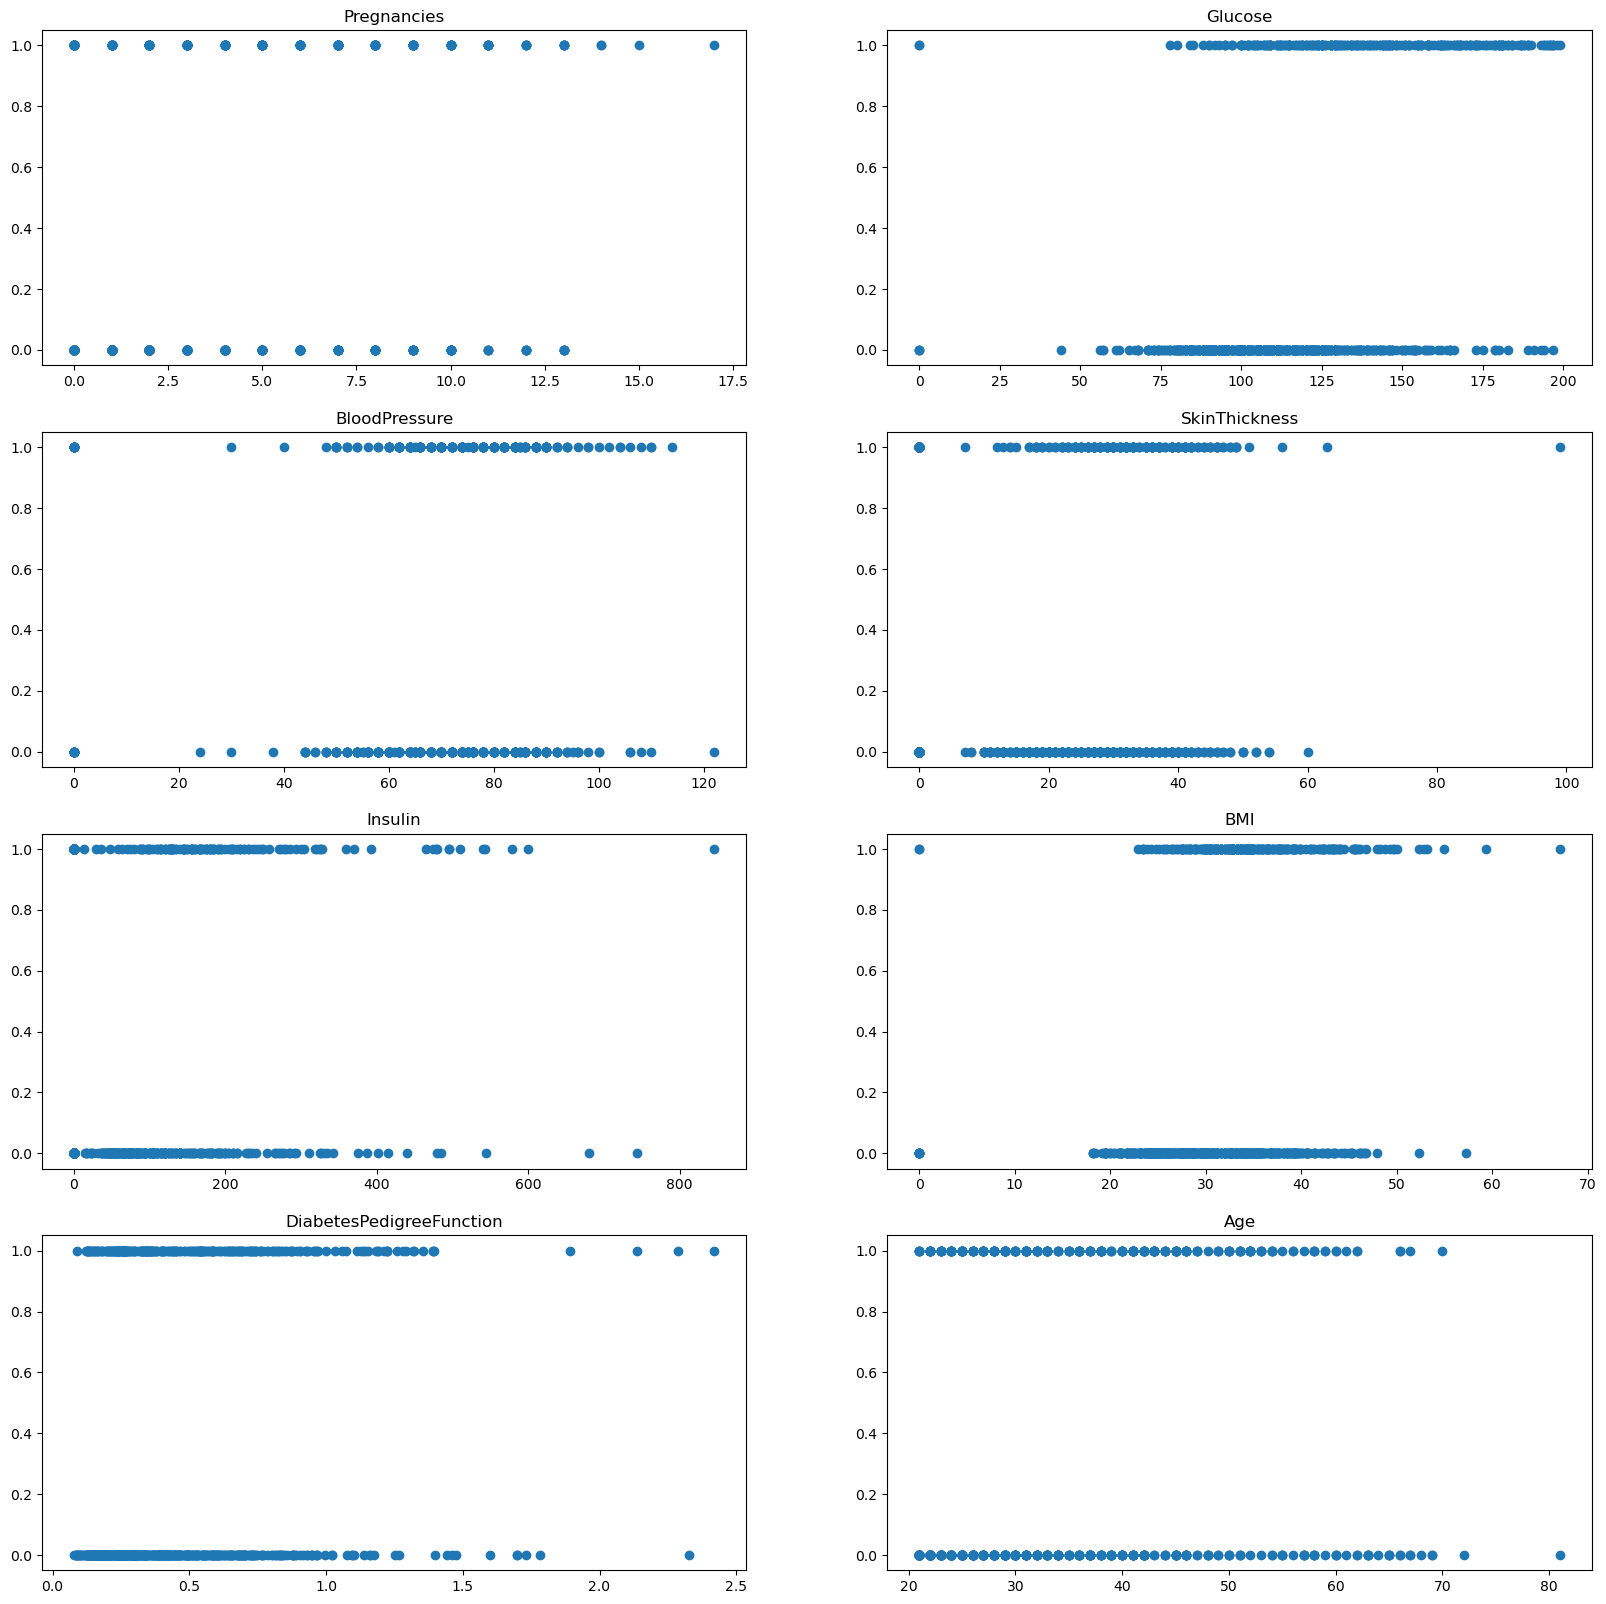

In [20]:
fig, axis = plt.subplots(4,2, figsize=(20, 20))
for i,ax in zip(columnsList,axis.flatten()):
    ax.scatter(df[i].tolist(),df[df.columns.tolist()[-1]].tolist())
    ax.set_title(i)
    

In [136]:
X = df[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']]

In [137]:
y = df["Outcome"]

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [139]:
X_train = np.array(X_train).reshape(-1,8)
X_test = np.array(X_test).reshape(-1,8)

In [141]:
from sklearn.preprocessing import StandardScaler 
  
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [142]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [144]:
y_pred = classifier.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[90 13]
 [18 33]]


In [146]:
#Out of 100 : 
#True Positive + True Negative = 90 + 33 
#False Positive + False Negative = 13 + 18
#Performance measure – Accuracy 

In [147]:
from sklearn.metrics import accuracy_score 
  
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7987012987012987
